In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [3]:
r = readers.CollectionReader('../src/ppo_epochs/agents')

100%|██████████| 128/128 [00:23<00:00,  5.34it/s]


In [9]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
nadv = r.df('normalized_advantage')
nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [10]:
games =  ["Walker2d-v2", "Hopper-v2", "HalfCheetah-v2", "Humanoid-v2"]
code_level_opts = {
      "ppo_epochs": [1, 10, 20, 50],
      'kl_penalty_direction': ['new_to_old', 'old_to_new'],
      #'reward_uniform_noise': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

NUM_BINS = 20

In [14]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [11]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [13]:
opt

,mean_reward,final_value_loss,mean_std,exp_id,opt_step
0,-0.632858,0.140553,0.986955,4eb154e5-baf0-4ea2-bdf6-65a8c257ef4d,0
1,35.204187,0.212322,0.985454,4eb154e5-baf0-4ea2-bdf6-65a8c257ef4d,1
2,60.717687,0.087565,0.983684,4eb154e5-baf0-4ea2-bdf6-65a8c257ef4d,2
3,170.527453,0.063367,0.981100,4eb154e5-baf0-4ea2-bdf6-65a8c257ef4d,3
4,167.099343,0.116588,0.955433,4eb154e5-baf0-4ea2-bdf6-65a8c257ef4d,4
...,...,...,...,...,...
495,170.488018,0.034598,0.081303,3d4d2894-e36b-45d9-8e1c-dc0ae5f626d0,495
496,154.186081,0.017698,0.081335,3d4d2894-e36b-45d9-8e1c-dc0ae5f626d0,496
497,188.976956,0.097706,0.082629,3d4d2894-e36b-45d9-8e1c-dc0ae5f626d0,497
498,169.253835,0.045571,0.083069,3d4d2894-e36b-45d9-8e1c-dc0ae5f626d0,498


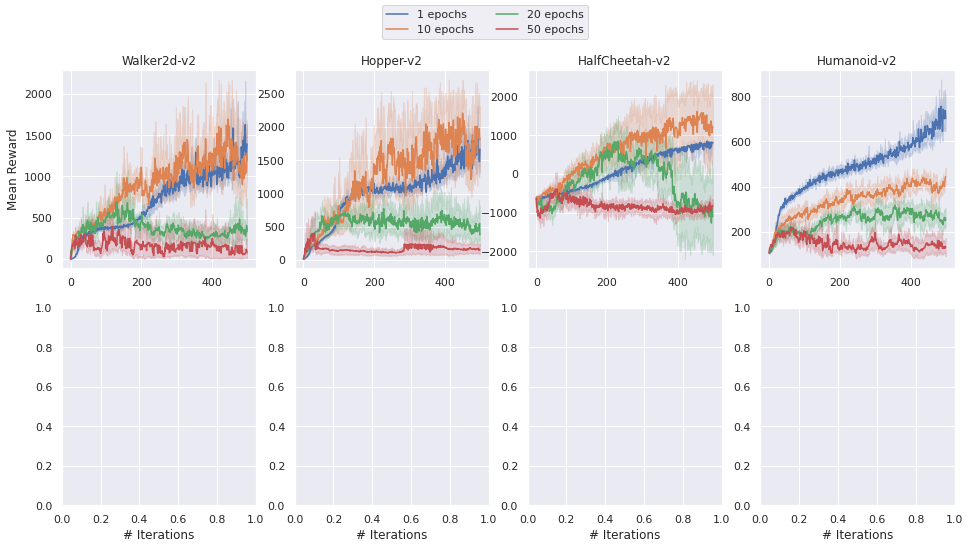

In [15]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['ppo_epochs']:
        filt = filter_opts(opt, ppo_epochs=c, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{c} epochs", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()